<a href="https://colab.research.google.com/github/RekAlrasheed/T5_TaskNotebooks/blob/main/A7bab_Allah_Team_Mini_Project_Two_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!kaggle datasets download -d stealthtechnologies/traffic-time-series-dataset


Dataset URL: https://www.kaggle.com/datasets/stealthtechnologies/traffic-time-series-dataset
License(s): apache-2.0
traffic-time-series-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [55]:
!unzip -q /content/traffic-time-series-dataset.zip

replace traffic_dataset_with_trend.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Step 1: Importing Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

Step 2: Data Preparation

In [57]:
df = pd.read_csv('/content/traffic_dataset_with_trend.csv', parse_dates=['Timestamp'])
df

,Timestamp,Weather,Events,Traffic Volume
0,2023-01-01 00:00:00,Cloudy,False,803.0
1,2023-01-01 01:00:00,Clear,False,861.0
2,2023-01-01 02:00:00,Clear,False,582.0
3,2023-01-01 03:00:00,Cloudy,False,236.0
4,2023-01-01 04:00:00,Cloudy,False,569.0
...,...,...,...,...
8731,2023-12-30 19:00:00,Cloudy,False,1118.0
8732,2023-12-30 20:00:00,Clear,False,1681.0
8733,2023-12-30 21:00:00,Cloudy,False,833.0
8734,2023-12-30 22:00:00,Clear,False,740.0


In [58]:
df.isna().sum()

,0
Timestamp,0
Weather,0
Events,0
Traffic Volume,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Timestamp       8736 non-null   datetime64[ns]
 1   Weather         8736 non-null   object        
 2   Events          8736 non-null   bool          
 3   Traffic Volume  8736 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), object(1)
memory usage: 213.4+ KB


In [60]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['is_weekend'] = df['Timestamp'].dt.dayofweek >= 5

df['is_weekend'] = df['is_weekend'].apply(lambda x: 1 if x else 0)

df['day_of_week'] = df['Timestamp'].dt.dayofweek

df['month'] = df['Timestamp'].dt.month

#df['year'] = df['Timestamp'].dt.year

df['hour'] = df['Timestamp'].dt.hour

df['season'] = df['Timestamp'].dt.month.apply(lambda x: 'Spring' if 3 <= x <= 5 else ('Summer' if 6 <= x <= 8 else ('Fall' if 9 <= x <= 11 else 'Winter')))

In [61]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar

start_date = '2018-01-01'
end_date = '2019-01-31'

# Generate the holiday calendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=start_date, end=end_date)

# Create a DataFrame for your date range
dates = pd.date_range(start=start_date, end=end_date, freq='D')
df_holiday = pd.DataFrame(index=dates)

# Mark holidays
df_holiday['is_holiday'] = df_holiday.index.isin(holidays).astype(int)

# Display some of the data to verify
df_holiday.head(10)


,is_holiday
2018-01-01,1
2018-01-02,0
2018-01-03,0
2018-01-04,0
2018-01-05,0
2018-01-06,0
2018-01-07,0
2018-01-08,0
2018-01-09,0
2018-01-10,0


In [62]:
# Merge the holiday DataFrame
df['is_holiday'] = df_holiday['is_holiday']

# Fill any missing values if 'df_main' covers more dates
df['is_holiday'].fillna(0, inplace=True)


In [63]:
df

,Timestamp,Weather,Events,Traffic Volume,is_weekend,day_of_week,month,hour,season,is_holiday
0,2023-01-01 00:00:00,Cloudy,False,803.0,1,6,1,0,Winter,0.0
1,2023-01-01 01:00:00,Clear,False,861.0,1,6,1,1,Winter,0.0
2,2023-01-01 02:00:00,Clear,False,582.0,1,6,1,2,Winter,0.0
3,2023-01-01 03:00:00,Cloudy,False,236.0,1,6,1,3,Winter,0.0
4,2023-01-01 04:00:00,Cloudy,False,569.0,1,6,1,4,Winter,0.0
...,...,...,...,...,...,...,...,...,...,...
8731,2023-12-30 19:00:00,Cloudy,False,1118.0,1,5,12,19,Winter,0.0
8732,2023-12-30 20:00:00,Clear,False,1681.0,1,5,12,20,Winter,0.0
8733,2023-12-30 21:00:00,Cloudy,False,833.0,1,5,12,21,Winter,0.0
8734,2023-12-30 22:00:00,Clear,False,740.0,1,5,12,22,Winter,0.0


In [64]:
# df['year'].value_counts()
# df['year'].unique()
#df = df.drop['year']

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Timestamp       8736 non-null   datetime64[ns]
 1   Weather         8736 non-null   object        
 2   Events          8736 non-null   bool          
 3   Traffic Volume  8736 non-null   float64       
 4   is_weekend      8736 non-null   int64         
 5   day_of_week     8736 non-null   int32         
 6   month           8736 non-null   int32         
 7   hour            8736 non-null   int32         
 8   season          8736 non-null   object        
 9   is_holiday      8736 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int32(3), int64(1), object(2)
memory usage: 520.5+ KB


In [66]:
df.head(20)

,Timestamp,Weather,Events,Traffic Volume,is_weekend,day_of_week,month,hour,season,is_holiday
0,2023-01-01 00:00:00,Cloudy,False,803.0,1,6,1,0,Winter,0.0
1,2023-01-01 01:00:00,Clear,False,861.0,1,6,1,1,Winter,0.0
2,2023-01-01 02:00:00,Clear,False,582.0,1,6,1,2,Winter,0.0
3,2023-01-01 03:00:00,Cloudy,False,236.0,1,6,1,3,Winter,0.0
4,2023-01-01 04:00:00,Cloudy,False,569.0,1,6,1,4,Winter,0.0
5,2023-01-01 05:00:00,Clear,False,867.0,1,6,1,5,Winter,0.0
6,2023-01-01 06:00:00,Rain,True,3713.0,1,6,1,6,Winter,0.0
7,2023-01-01 07:00:00,Cloudy,False,806.0,1,6,1,7,Winter,0.0
8,2023-01-01 08:00:00,Clear,True,4234.0,1,6,1,8,Winter,0.0
9,2023-01-01 09:00:00,Cloudy,False,1062.0,1,6,1,9,Winter,0.0


In [67]:
df = pd.get_dummies(df, columns=['Weather', 'season'])

In [68]:
df

,Timestamp,Events,Traffic Volume,is_weekend,day_of_week,month,hour,is_holiday,Weather_Clear,Weather_Cloudy,Weather_Rain,Weather_Snow,season_Fall,season_Spring,season_Summer,season_Winter
0,2023-01-01 00:00:00,False,803.0,1,6,1,0,0.0,False,True,False,False,False,False,False,True
1,2023-01-01 01:00:00,False,861.0,1,6,1,1,0.0,True,False,False,False,False,False,False,True
2,2023-01-01 02:00:00,False,582.0,1,6,1,2,0.0,True,False,False,False,False,False,False,True
3,2023-01-01 03:00:00,False,236.0,1,6,1,3,0.0,False,True,False,False,False,False,False,True
4,2023-01-01 04:00:00,False,569.0,1,6,1,4,0.0,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,2023-12-30 19:00:00,False,1118.0,1,5,12,19,0.0,False,True,False,False,False,False,False,True
8732,2023-12-30 20:00:00,False,1681.0,1,5,12,20,0.0,True,False,False,False,False,False,False,True
8733,2023-12-30 21:00:00,False,833.0,1,5,12,21,0.0,False,True,False,False,False,False,False,True
8734,2023-12-30 22:00:00,False,740.0,1,5,12,22,0.0,True,False,False,False,False,False,False,True


In [69]:
le = LabelEncoder()
df['Weather_Clear'] = le.fit_transform(df['Weather_Clear'])
df['Weather_Cloudy'] = le.fit_transform(df['Weather_Cloudy'])
df['Weather_Rain'] = le.fit_transform(df['Weather_Rain'])
df['Weather_Snow'] = le.fit_transform(df['Weather_Snow'])
df['season_Fall'] = le.fit_transform(df['season_Fall'])
df['season_Spring'] = le.fit_transform(df['season_Spring'])
df['season_Summer'] = le.fit_transform(df['season_Summer'])
df['season_Winter'] = le.fit_transform(df['season_Winter'])
df['Events'] = le.fit_transform(df['Events'])

In [70]:
df.head()

,Timestamp,Events,Traffic Volume,is_weekend,day_of_week,month,hour,is_holiday,Weather_Clear,Weather_Cloudy,Weather_Rain,Weather_Snow,season_Fall,season_Spring,season_Summer,season_Winter
0,2023-01-01 00:00:00,0,803.0,1,6,1,0,0.0,0,1,0,0,0,0,0,1
1,2023-01-01 01:00:00,0,861.0,1,6,1,1,0.0,1,0,0,0,0,0,0,1
2,2023-01-01 02:00:00,0,582.0,1,6,1,2,0.0,1,0,0,0,0,0,0,1
3,2023-01-01 03:00:00,0,236.0,1,6,1,3,0.0,0,1,0,0,0,0,0,1
4,2023-01-01 04:00:00,0,569.0,1,6,1,4,0.0,0,1,0,0,0,0,0,1


<Figure size 2000x700 with 0 Axes>

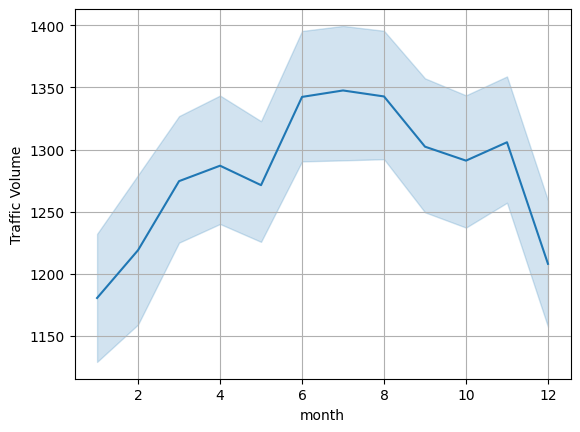

<Figure size 2000x700 with 0 Axes>

In [71]:
sns.lineplot(x ='month' , y = 'Traffic Volume' , data = df)
plt.grid(True)
plt.figure(figsize=(20,7))

<Axes: >

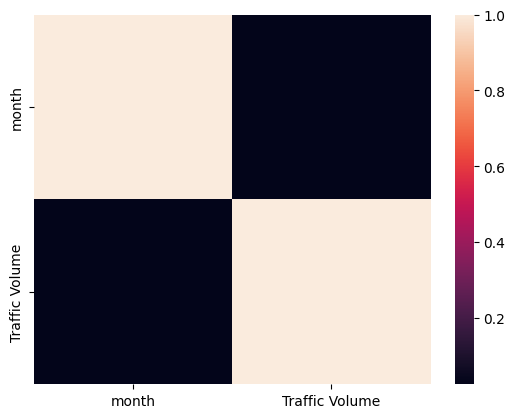

In [72]:
num = df[['month' , 'Traffic Volume']]
sns.heatmap(num.corr())

In [73]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'



df['season'] = df['Timestamp'].dt.month.apply(get_season)

# df[['date_time', 'season']].head()

In [74]:
df['hour'] = df['Timestamp'].dt.hour

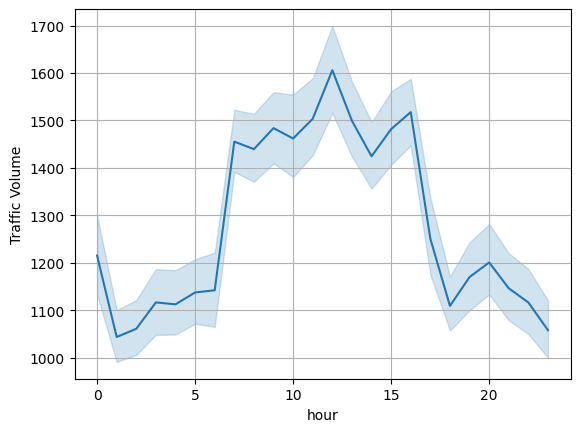

In [75]:
sns.lineplot(x='hour' , y = 'Traffic Volume' , data = df)
plt.grid(True)

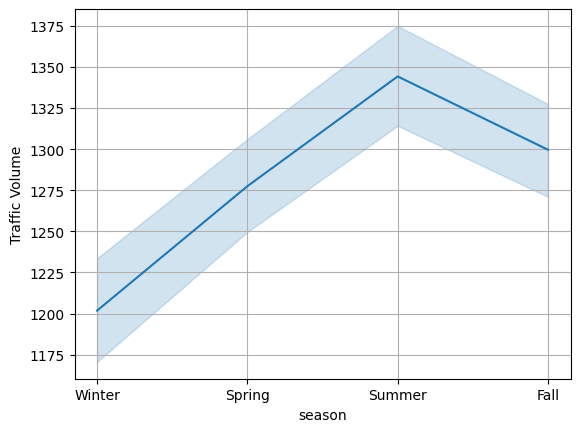

In [76]:
sns.lineplot(x = 'season' , y = 'Traffic Volume' , data =df)
plt.grid(True)

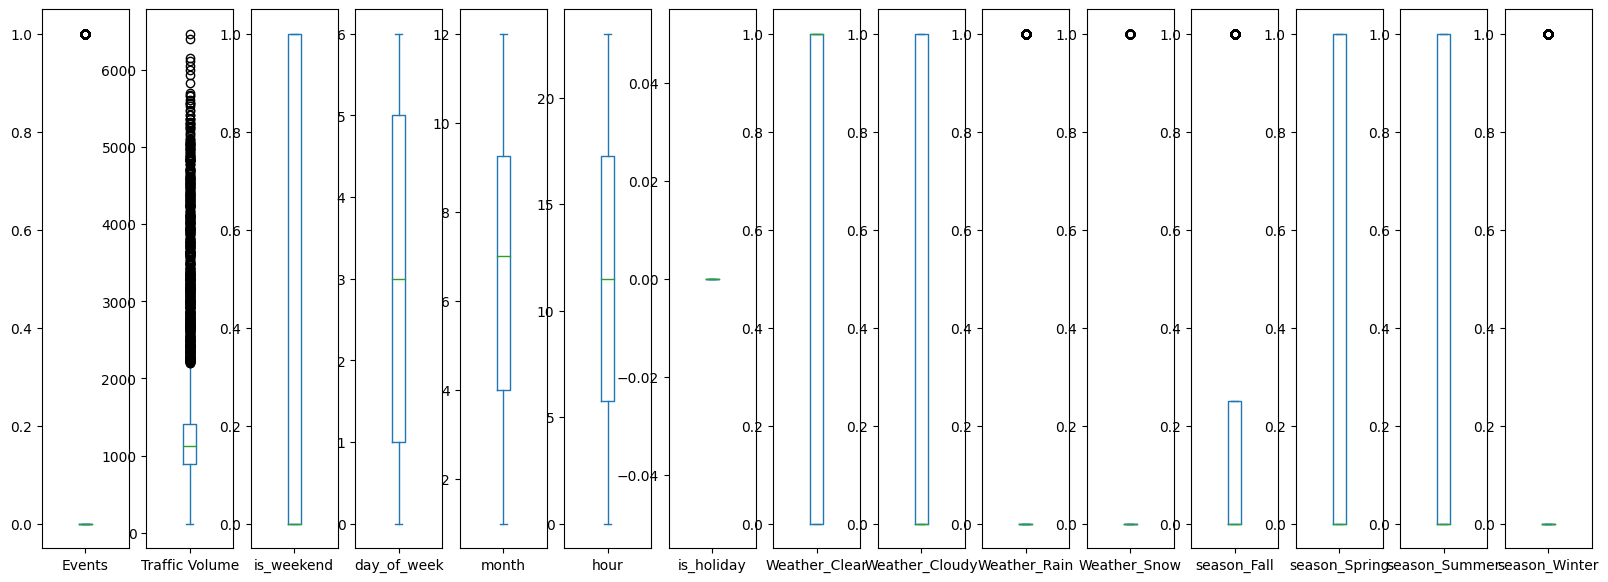

In [77]:
df.plot(kind= 'box' , figsize=(20,7) , subplots=True);

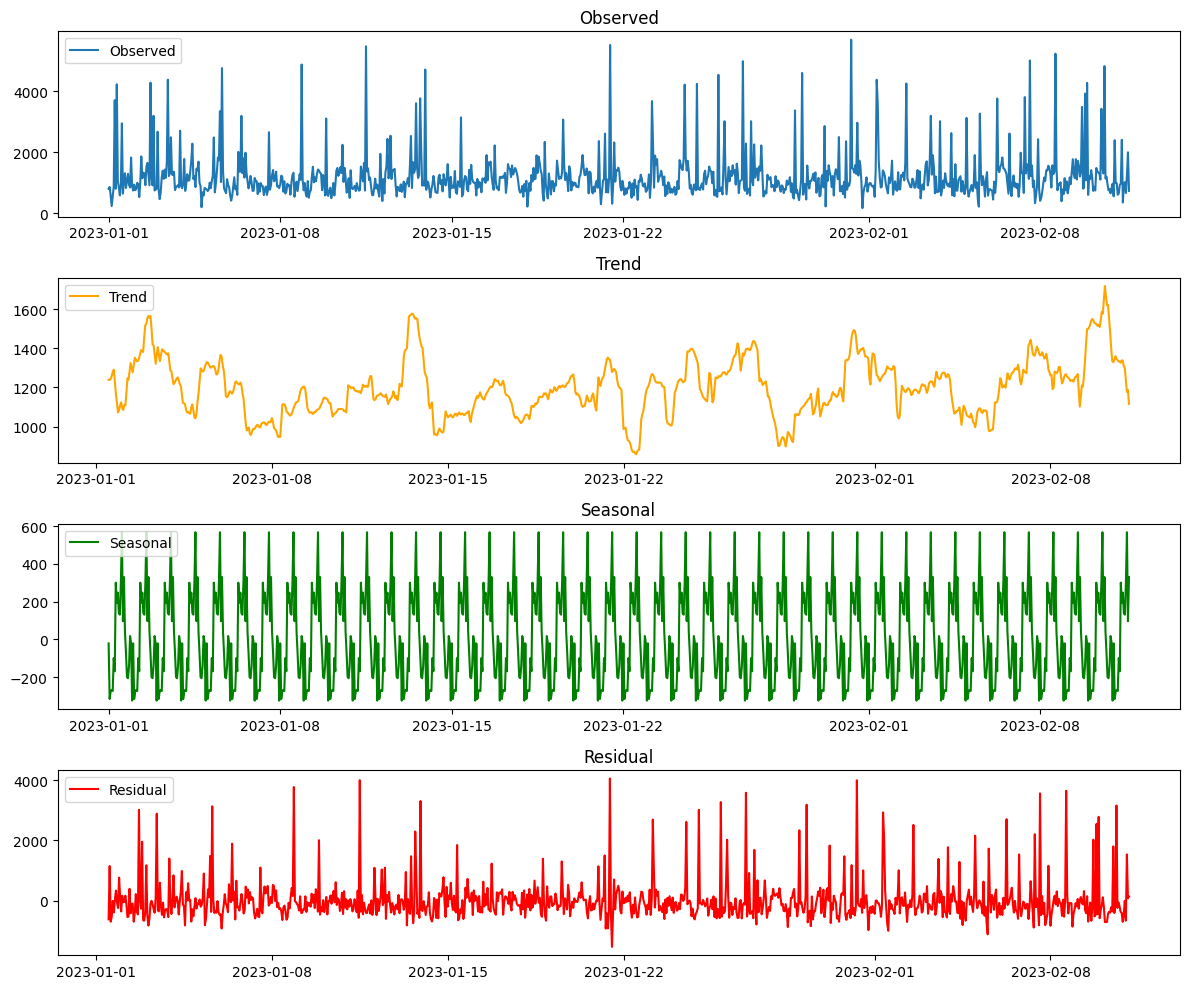

In [78]:
df2 = df
df2.set_index('Timestamp',inplace=True)
X = df2['Traffic Volume'].iloc[:1000]
result = seasonal_decompose(X , model = 'additive' , period = 24)


plt.figure(figsize=(12, 10))

# Observed (Original Time Series)
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')
plt.title('Observed')

# Trend
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend')

# Seasonal (Cycle)
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal')

# Residuals
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.title('Residual')


plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

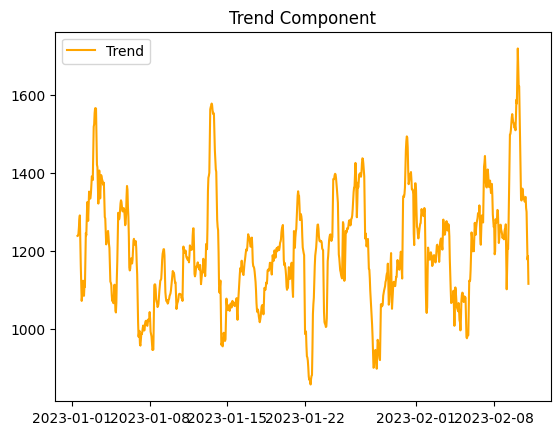

<Figure size 2000x1500 with 0 Axes>

In [79]:
plt.plot(result.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Component')
plt.figure(figsize=(20, 15))


In [28]:
df["Weather_Cloudy"].value_counts()

,count
Weather_Cloudy,
0,6033
1,2703


 step 3 : Normalize the data


In [29]:
df

,Timestamp,Events,Traffic Volume,is_weekend,day_of_week,month,hour,is_holiday,Weather_Clear,Weather_Cloudy,Weather_Rain,Weather_Snow,season_Fall,season_Spring,season_Summer,season_Winter,season
0,2023-01-01 00:00:00,0,803.0,1,6,1,0,0.0,0,1,0,0,0,0,0,1,Winter
1,2023-01-01 01:00:00,0,861.0,1,6,1,1,0.0,1,0,0,0,0,0,0,1,Winter
2,2023-01-01 02:00:00,0,582.0,1,6,1,2,0.0,1,0,0,0,0,0,0,1,Winter
3,2023-01-01 03:00:00,0,236.0,1,6,1,3,0.0,0,1,0,0,0,0,0,1,Winter
4,2023-01-01 04:00:00,0,569.0,1,6,1,4,0.0,0,1,0,0,0,0,0,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,2023-12-30 19:00:00,0,1118.0,1,5,12,19,0.0,0,1,0,0,0,0,0,1,Winter
8732,2023-12-30 20:00:00,0,1681.0,1,5,12,20,0.0,1,0,0,0,0,0,0,1,Winter
8733,2023-12-30 21:00:00,0,833.0,1,5,12,21,0.0,0,1,0,0,0,0,0,1,Winter
8734,2023-12-30 22:00:00,0,740.0,1,5,12,22,0.0,1,0,0,0,0,0,0,1,Winter


In [30]:
df['lag1'] = df['Traffic Volume'].shift(1)
df['diff1'] = df['Traffic Volume'].diff()
df['rolling_mean_3'] = df['Traffic Volume'].rolling(window=3).mean()
df['rolling_std_3'] = df['Traffic Volume'].rolling(window=3).std()

In [31]:
df.set_index('Timestamp',inplace=True)

In [32]:
df.dropna(inplace=True)

In [33]:
# # prompt: do minmaxscaller to  Traffic value columns

# scaler = MinMaxScaler()
# df['Traffic Volume'] = scaler.fit_transform(df['Traffic Volume'].values.reshape(-1, 1))



In [34]:
# features = df[['Traffic Volume']]
# scaled_features = scaler.fit_transform(features)

In [35]:
df

,Events,Traffic Volume,is_weekend,day_of_week,month,hour,is_holiday,Weather_Clear,Weather_Cloudy,Weather_Rain,Weather_Snow,season_Fall,season_Spring,season_Summer,season_Winter,season,lag1,diff1,rolling_mean_3,rolling_std_3
Timestamp,,,,,,,,,,,,,,,,,,,,
2023-01-01 02:00:00,0,582.0,1,6,1,2,0.0,1,0,0,0,0,0,0,1,Winter,861.0,-279.0,748.666667,147.222055
2023-01-01 03:00:00,0,236.0,1,6,1,3,0.0,0,1,0,0,0,0,0,1,Winter,582.0,-346.0,559.666667,313.097961
2023-01-01 04:00:00,0,569.0,1,6,1,4,0.0,0,1,0,0,0,0,0,1,Winter,236.0,333.0,462.333333,196.118162
2023-01-01 05:00:00,0,867.0,1,6,1,5,0.0,1,0,0,0,0,0,0,1,Winter,569.0,298.0,557.333333,315.661739
2023-01-01 06:00:00,1,3713.0,1,6,1,6,0.0,0,0,1,0,0,0,0,1,Winter,867.0,2846.0,1716.333333,1735.571760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-30 19:00:00,0,1118.0,1,5,12,19,0.0,0,1,0,0,0,0,0,1,Winter,1250.0,-132.0,1181.666667,66.123622
2023-12-30 20:00:00,0,1681.0,1,5,12,20,0.0,1,0,0,0,0,0,0,1,Winter,1118.0,563.0,1349.666667,294.435618
2023-12-30 21:00:00,0,833.0,1,5,12,21,0.0,0,1,0,0,0,0,0,1,Winter,1681.0,-848.0,1210.666667,431.527906


In [36]:
def create_sequences(data, target, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step)])
        y.append(target[i + time_step])
    return np.array(X), np.array(y)

In [37]:

scaler = MinMaxScaler()
df['Traffic Volume'] = scaler.fit_transform(df['Traffic Volume'].values.reshape(-1, 1))



In [38]:
features = df[['Traffic Volume']]
scaled_features = scaler.fit_transform(features)

In [39]:
time_step = 50
X, y = create_sequences(scaled_features, df['Traffic Volume'], time_step)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-36-dbe3835461ac>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(target[i + time_step])


In [40]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0152 - val_loss: 0.0135
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0137 - val_loss: 0.0138
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0129 - val_loss: 0.0131
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0136 - val_loss: 0.0130
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0145 - val_loss: 0.0130
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0133 - val_loss: 0.0131
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0138 - val_loss: 0.0130
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0127 - val_loss: 0.0130
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0140 - val_loss: 0.0131
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0132 - val_loss: 0.0130
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0145 - val_loss: 0.0130
Epoch 12/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms

In [42]:
# LSTM Model Prediction
lstm_predictions = model.predict(X_test)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [45]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for LSTM
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
print(f'LSTM Model RMSE: {lstm_rmse:.2f}')

LSTM Model RMSE: 0.10


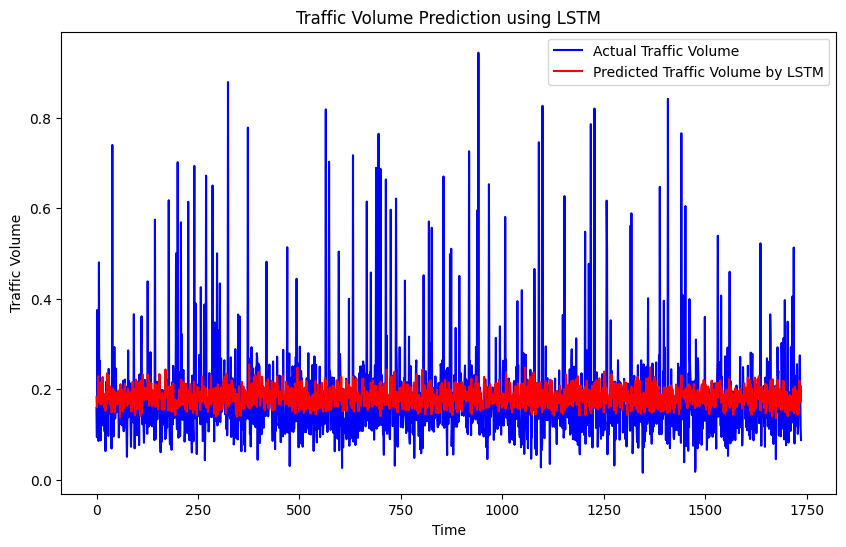

In [46]:
# Inverse transform to get actual values
lstm_predictions_actual = scaler.inverse_transform(lstm_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Traffic Volume')
plt.plot(lstm_predictions_actual, color='red', label='Predicted Traffic Volume by LSTM')
plt.title('Traffic Volume Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

In [47]:
#GRU MODEL
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional

model_gru = Sequential()
model_gru.add(Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model_gru.add(Dropout(0.3))
model_gru.add(Bidirectional(GRU(64)))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(1))

model_gru.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
history_gru = model_gru.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)


Epoch 1/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0180 - val_loss: 0.0135
Epoch 2/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0143 - val_loss: 0.0133
Epoch 3/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0140 - val_loss: 0.0131
Epoch 4/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0142 - val_loss: 0.0135
Epoch 5/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0123 - val_loss: 0.0130
Epoch 6/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0156 - val_loss: 0.0131
Epoch 7/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0142 - val_loss: 0.0131
Epoch 8/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0134 - val_loss: 0.0130
Epoch 9/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0147 - val_loss: 0.0130
Epoch 10/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0137 - val_loss: 0.0129
Epoch 11/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0123 - val_loss: 0.0129
Epoch 12/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


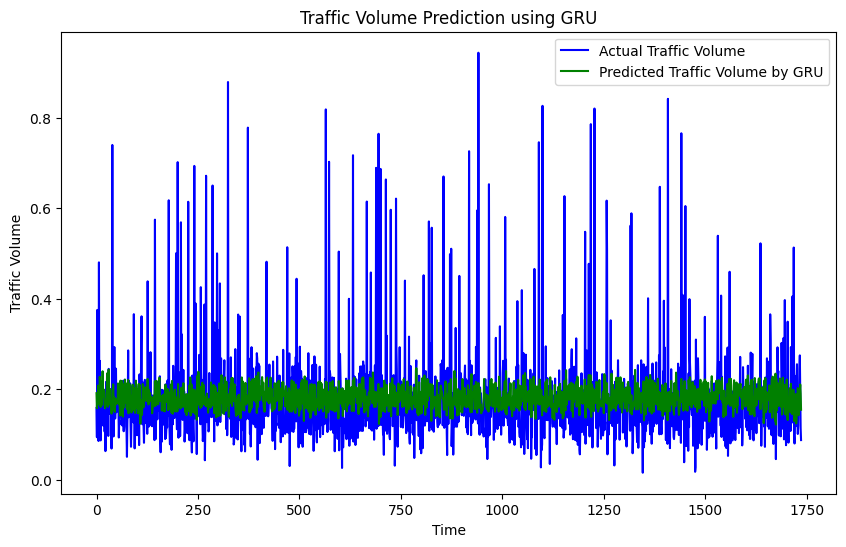

In [49]:
# GRU Model Prediction
gru_predictions = model_gru.predict(X_test)

# Inverse transform to get actual values
gru_predictions_actual = scaler.inverse_transform(gru_predictions)
# assuming y_test_actual is already transformed above

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Traffic Volume')
plt.plot(gru_predictions_actual, color='green', label='Predicted Traffic Volume by GRU')
plt.title('Traffic Volume Prediction using GRU')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


In [50]:
# Calculate RMSE for GRU
gru_rmse = np.sqrt(mean_squared_error(y_test_actual, gru_predictions_actual))
print(f'GRU Model RMSE: {gru_rmse:.2f}')

GRU Model RMSE: 0.10


In [51]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(string, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(string)
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R-squared (R²): {r2:.3f}\n")


evaluate_model('LSTM:', y_test_actual, lstm_predictions_actual)


gru_results = evaluate_model("GRU:", y_test_actual, gru_predictions_actual)


LSTM:
Mean Squared Error (MSE): 0.011
Root Mean Squared Error (RMSE): 0.104
Mean Absolute Error (MAE): 0.061
Mean Absolute Percentage Error (MAPE): 41.02%
R-squared (R²): 0.052

GRU:
Mean Squared Error (MSE): 0.011
Root Mean Squared Error (RMSE): 0.104
Mean Absolute Error (MAE): 0.061
Mean Absolute Percentage Error (MAPE): 40.07%
R-squared (R²): 0.044



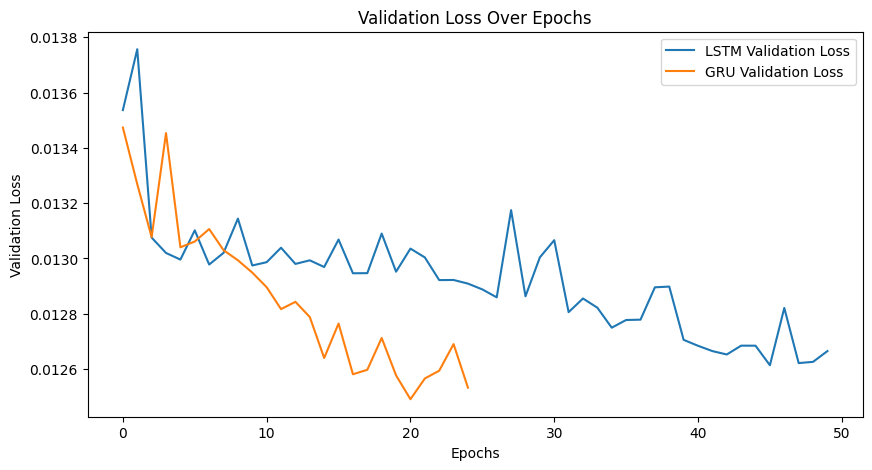

In [52]:
import matplotlib.pyplot as plt

# Plotting the validation loss for LSTM
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


Step 5 : Save the model
